In [1]:
from numpy.random import uniform

In [2]:
x = uniform(0,100,30) #숫자를 랜덤으로 고르게 나오게 함.(0-100사이 숫자 30개)

In [3]:
import numpy as np

In [4]:
np.mean(x) #x의 평균

49.244142664520645

In [22]:
#데이터를 만드는 작업 -> 샘플링
for _ in range(50): #i를 안쓰고 비워둘 때, 관습적으로 _를 쓴다. 
    x = uniform(0,100,30) # 데이터 x를 만든다
    m = np.mean(x) #x의 평균
    print(m)

54.87322768924709
51.78075487455943
48.862634755961395
51.575696484587
54.64564877936803
40.31697315031885
46.309409130482734
56.499703324227355
48.49152560090615
44.368118450397404
52.98823168278074
50.2808460860706
52.69147959391513
41.1021786875734
53.2021120355056
46.56287688620633
41.4049659403893
54.00306469410915
55.31108225171601
48.701957394808346
47.48150270284794
51.21690726380723
59.596672781061216
42.05114840589692
57.83571577627775
45.142224922253455
52.22864841862981
50.48161130273263
50.98868539692242
48.747027315766935
46.24487839765875
47.32901094412888
46.07985769951573
41.77727874875789
52.331768890947686
47.17964924710519
48.419984414557696
62.359474206739264
47.923635800452665
55.191331093373755
55.431669963429265
42.58582816204308
44.857676394713884
36.006242489872186
40.74169514106889
54.04001584362027
43.10138712699548
45.57019202864256
57.55972308614626
49.492404520811775


In [24]:
#샘플링 분포
ms = [] # 빈 리스트를 만든다 
for _ in range(50): #i를 안쓰고 비워둘 때, 관습적으로 _를 쓴다. 
    x = uniform(0,100,30) # 데이터 x를 만든다
    m = np.mean(x) #x의 평균
    ms.append(m) #리스트의 평균 추가

In [5]:
import seaborn

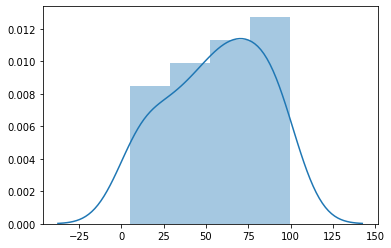

In [31]:
seaborn.distplot(x) #하나의 샘플에서 데이터는 어떻게 퍼져 있는가? 
# 0 -100 사이에서 고르게 나옴. 

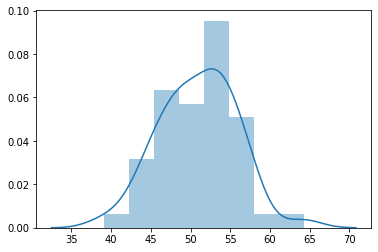

In [27]:
seaborn.distplot(ms) #샘플링할 때마다 평균이 어떻게 달라지는 가? 
# 각각의 평균이 50근처에 위치하기 때문에, 50에 몰려있는 형태 -> sampling distribution

In [32]:
import sklearn

# 95% 신뢰구간

In [33]:
np.quantile(ms,.025) #하위 2.5%

42.4593929429713

In [34]:
np.quantile(ms,.975) #하위 97.5% (상위 2.5%)

57.97858390747937

# 99% 신뢰구간

In [38]:
np.quantile(ms,.005) #하위 0.5%

39.875223985062036

In [36]:
np.quantile(ms,.995) #하위 99.5% (상위 0.5%)

62.71819370906257

In [39]:
import pandas 

In [43]:
cars = pandas.read_csv('cars.csv')

In [46]:
cars.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [48]:
np.mean(cars['speed'])

15.4

In [49]:
cars['speed'].mean()

15.4

# 샘플이 하나일 때, 추정 범위를 어떻게 구할 수 있을까? 

In [29]:
from sklearn.utils import resample

In [57]:
resample([3,4,5])

[5, 5, 5]

In [58]:
resample(cars['speed'])

14    12
22    14
27    16
29    17
21    14
30    17
26    16
11    12
2      7
28    17
25    15
16    13
44    23
0      4
24    15
10    11
36    19
17    13
48    24
36    19
0      4
25    15
9     11
20    14
14    12
0      4
10    11
37    19
18    13
28    17
18    13
49    25
9     11
9     11
32    18
33    18
2      7
38    20
36    19
31    18
14    12
42    20
4      8
6     10
25    15
12    12
20    14
33    18
11    12
20    14
Name: speed, dtype: int64

In [62]:
ms = []
for _ in range(1000):
    x = resample(cars['speed']) #우리가 가진 샘플에서 다시 샘플링 : 현실에선 실제 값을 모른다. 우리가 가지고 있는 경우는 대부분의 샘플(데이터)임
    # 위에서는 uniform(모분포)이었는데, 바뀐 부분은 여기당. 샘플에서 뽑는다는 거! (모분포가 아니라 샘플)
    m = np.mean(x) #평균
    ms.append(m) # 리스트에 추가

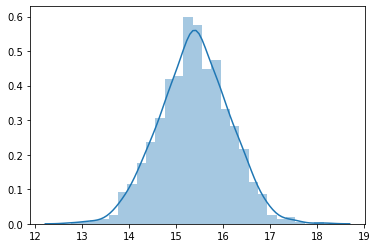

In [64]:
seaborn.distplot(ms)
# 평균이 15 근처였으니까 요 근처에서 많이 나옴 

In [66]:
# 정확하게 신뢰구간을 구하려면 quantile 써서 하면 됨. 
np.quantile(ms,.025)  # 평균 밑 범위가 13.91

13.919500000000001

In [67]:
np.quantile(ms,.975) #평균 위쪽 범위 16.80

16.801

In [68]:
13.91-15.4 # 평균 밑 범위가 -1.4 정도 떨어져있음

-1.4900000000000002

In [69]:
16.80 - 15.4 #평균 위쪽 범위가 1.4 떨어져있음

1.4000000000000004

## 결론 : 평균 15.4에서 +- 1.4 정도 범위를 가진다
### bootstrapping 방법이 간단하기 때문에 추천, 더 많이 쓰임

In [27]:
from scipy.stats import norm, uniform

# 실습 
## cars'의 dist 컬럼의 중간값(median)을 구하고 그 95% 신뢰구간을 구해보세요

In [73]:
np.median(cars['dist'])

36.0

In [74]:
resample(cars['dist'])

49     85
0       2
43     66
44     54
18     46
1      10
16     34
49     85
5      10
18     46
20     36
43     66
29     40
26     32
33     76
13     24
13     24
23     20
46     92
15     26
12     20
22     80
0       2
11     14
45     70
12     20
26     32
39     48
44     54
31     42
30     50
45     70
29     40
22     80
24     26
41     56
49     85
19     26
12     20
11     14
48    120
28     32
23     20
17     34
10     28
41     56
34     84
48    120
42     64
13     24
Name: dist, dtype: int64

In [76]:
md = []
for _ in range(1000):
    x = resample(cars['dist'])
    m = np.median(x) #평균
    md.append(m) # 리스트에 추가

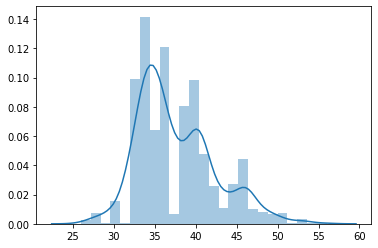

In [77]:
seaborn.distplot(md)

In [78]:
np.quantile(md,.025)

30.0

In [80]:
np.quantile(md,.975)

48.0

In [81]:
30 - 36

-6

In [82]:
48 - 36

12

### 결과: 중간값 36에서 범위는 -6 ~ 12 값이다. 

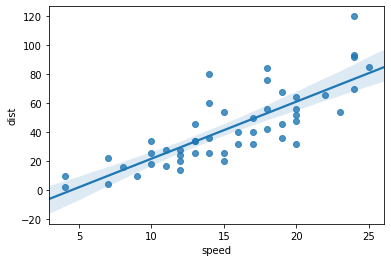

In [84]:
# 스피드와 dist(거리) 관계는 선형모형으로 나타낼 수 있다. 
seaborn.regplot('speed','dist', cars)

In [19]:
from sklearn.linear_model import LinearRegression #선형 모형 

In [99]:
model = LinearRegression() 

In [113]:
x['speed'].shape # 시퀀스 : 표의 형태가 아니라 일차원 자료형(데이터가 한줄로 늘어서있는 일차원 자료형

(50,)

In [ ]:
x['speed'] #표 형태

In [102]:
x = cars[['speed']] #독립변수
y = cars[['dist']] #종속변수
model.fit(x,y) #파라미터 추정

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
model.coef_ #독립변수의 가중치(ax+b에서 a에 해당) 
# coeffiecnt 의 약자 (계수)
# 속도가 1늘어날 때 제동거리는 3정도 늘어난다. 
# fitting 된 값들은 뒤에 _가 붙는다(파라미터로 추정된 값들)
# 컬럼을 여러개 넣으면 순서대로 여러개에 대한 값이 나온다.(밑에서 실습)

array([[3.93240876]])

In [116]:
model.intercept_ #절편(ax+b에서 b에 해당)
# b의 값을 아니까 x에 속도값을 넣어서 a값을 곱하고 b를 더하면 됨.

array([-17.57909489])

# 실습 : 부트스트래핑으로 선형 모형의 파라미터의 95% 신뢰구간 구하기

In [115]:
resample(cars) #cars와 똑같이 생긴 새로운 데이터 샘플 
# 주의점 : 따로따로 뽑으면 안되고 같이 데이터 순서에 맞게 뽑아야함 

,Unnamed: 0,speed,dist
30,31,17,50
42,43,20,64
22,23,14,80
31,32,18,42
31,32,18,42
34,35,18,84
44,45,23,54
19,20,14,26
14,15,12,28
23,24,15,20


In [137]:
coefs = [] #coef
intercepts = [] #intercept

for _ in range(1000):
    df = resample(cars) # 샘플링
    x = df[['speed']]   # 독립변수 
    y = df[['dist']]    # 종속변수 
    
    model = LinearRegression()   #모형만들기 
    model.fit(x,y)               # 파라미터 추정
    
    coefs.append(model.coef_)     #추정한 계수를 리스트에 추가 
    intercepts.append(model.intercept_) #추정한 절편을 리스트에 추가 

In [138]:
coefs = [] #coef
intercepts = [] #intercept

for _ in range(1000):
    df = resample(cars) # 샘플링
    
    model = LinearRegression()   #모형만들기 
    model.fit(df[['speed']] ,df[['dist']])               # 파라미터 추정
    
    coefs.append(model.coef_)     #추정한 계수를 리스트에 추가 
    intercepts.append(model.intercept_) #추정한 절편을 리스트에 추가 

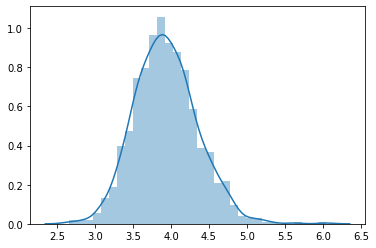

In [139]:
seaborn.distplot(coefs)

In [145]:
np.quantile(coefs,[.025,.975])

array([3.17945083, 4.76708914])

In [146]:
3.17 - 3.93 ,  4.76 - 3.93

(-0.7600000000000002, 0.8299999999999996)

### 결과 = parameter coef(a)의 평균 3.93에서 -0.76 - +0.82 범위값을 가진다. 
### 속도가 빠르면 제동거리(dist)가 늘어난다. 

### 만약 계수가 - 와 + 범위값이라면? 달라짐: -구간인 경우에는 속도가 빨라지면 제동거리가 줄어든다/ 반대로 +의 값에선 속도가 증가 할때 제동거리도 증가한다.  -> 엇갈리는 결론이 나옴. 

# 결국, +로 일정하게 나오거나 -로 일정하게 나오면 결론은 같고 차이만 존재하지만,

# +-가 같이 나오면 결론이 달라짐 : 결국 action을 취할 수 없다 (해석할 수 없다) :

### 데이터를 더 모아야한다 (데이터를 많이 모을수록 신뢰구간이 줄어든다 -> 같은 범위 값을 가진다) 

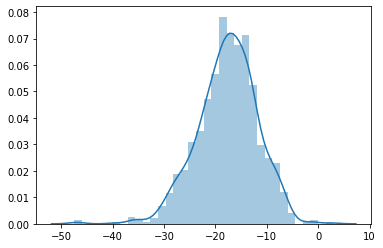

In [140]:
seaborn.distplot(intercepts)

In [147]:
np.quantile(intercepts,[.025,.975])

array([-29.47198638,  -7.18686717])

In [148]:
-29.47 -17.57 , -7.18 -17.57 

(-47.04, -24.75)

### 결과 = parameter intercepts(b)의 평균 -17에서 -47 에서 -24 범위값을 가진다. 

# 데이터를 많이 모으면 신뢰구간이 줄어든다

In [7]:
sample_size = 30

In [8]:
ms = []
for _ in range(10000):
    x = uniform(0, 100, sample_size)  # 우리가 가진 샘플에서 다시 샘플링
    m = np.mean(x)            # 평균
    ms.append(m)
    
np.quantile(ms, [.025, .975])

array([39.88865564, 60.49241625])

In [9]:
smaple_size = 1000

In [10]:
ms = []
for _ in range(10000):
    x = uniform(0, 100, sample_size)  # 우리가 가진 샘플에서 다시 샘플링
    m = np.mean(x)            # 평균
    ms.append(m)
np.quantile(ms, [.025, .975])

array([39.57605413, 60.08599359])

### 작은 sample: 신뢰구간이 길다 -> 리샘플링을 많이 한다 : 신뢰구간을 정확하게 만들기 위해서지 좁아지는 건 아니다 
### 큰 smaple : 신뢰구간이 짧다

### 신뢰구간에 정답이 있을까? 
- 있다! 모분포를 무한히 smapling 하면 됨 ㅎㅎ 
- sample 적당히 많이 smapling (이게 바로 부드스트래핑) 
- 실제로는 데이터를 많이 모으면 더 넓어지는 쪽으로 신뢰구간이 길이지면서 정확해진다. (나오는 데이터가 많으니까..!) 
- 헷갈리는 점! 신뢰구간이 좁아져야 좋고(중요), 그러면서 신뢰구간이 정확해야한다고 한다. 
- 근데 샘플이 크면 실제 신뢰구간이 좁고, 리샘플링을 많이 할수록 데이터가 많아지니까 추정된 신뢰구간이 넓어진다(그러면서 정확해짐) 요 부분이 헷갈림 
- **그러니까 결론! 샘플은 커야하고, 리샘플링은 많이 할수록 좋다**
- 샘플을 키워야 현실(실제) 데이터가 바뀌고, 리샘플링은 추정치 값이 달라지는 거. 


# 실습2

In [12]:
import pandas

In [14]:
sleep = pandas.read_csv('sleep.csv')

In [15]:
sleep.head()

,Unnamed: 0,extra,group,ID
0,1,0.7,1,1
1,2,-1.6,1,2
2,3,-0.2,1,3
3,4,-1.2,1,4
4,5,-0.1,1,5


In [74]:
# group -> extra
# a*group + b 
sleep['group']
sleep['extra']

0     0.7
1    -1.6
2    -0.2
3    -1.2
4    -0.1
5     3.4
6     3.7
7     0.8
8     0.0
9     2.0
10    1.9
11    0.8
12    1.1
13    0.1
14   -0.1
15    4.4
16    5.5
17    1.6
18    4.6
19    3.4
Name: extra, dtype: float64

In [75]:
model = LinearRegression() 

In [76]:
x = sleep[['group']] #독립변수
y = sleep[['extra']] #종속변수
model.fit(x,y) #파라미터 추정

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
model.coef_

array([[1.58]])

In [78]:
model.intercept_

array([-0.83])

In [ ]:
# 선형모형 = 1.58*group -0.83

In [79]:
coefs = [] #coef
intercepts = [] #intercept

for _ in range(1000):
    df = resample(sleep) # 샘플링
    model = LinearRegression()   #모형만들기 
    model.fit(df[['group']] ,df[['extra']])               # 파라미터 추정
    coefs.append(model.coef_)     #추정한 계수를 리스트에 추가 
    intercepts.append(model.intercept_) #추정한 절편을 리스트에 추가 

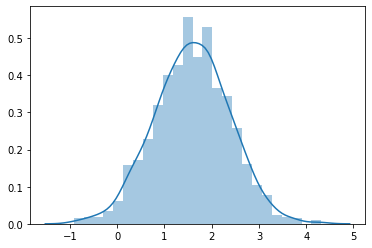

In [80]:
seaborn.distplot(coefs)

In [81]:
np.quantile(coefs,[.025,.975]) #신뢰구간 값 구하기 

array([0.04146429, 3.111     ])

In [82]:
(0.04 - 1.5, 3.1 - 0.5) **# 신뢰구간의 범위  -+ 값임

(-1.46, 2.6)

## -> 신뢰구간이 넓어서 샘플을 더 모아야 한다. (0 정답! 
### -> resampling을 더한다. (x : 그냥 원래 많이 해야 함 
### -> resampling을 덜한다. (x : 신뢰 구간이 부정확해지면서 운 좋게 넘어갈 수도 있는 (사실 데이터 조작 ㅎ)

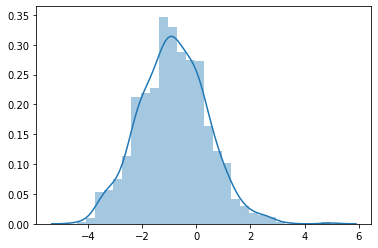

In [61]:
seaborn.distplot(intercepts)

In [65]:
np.quantile(intercepts,[.025,.975])

array([-3.340875  ,  1.69368298])